#  Copyright (c) 2020 LG Electronics Inc.
#  SPDX-License-Identifier: GPL-3.0-or-later
# ImageNet Experiments with MobileNet Inference using Profiler

In [2]:
We performed many ImageNet Experiments in the inference mode under different Compute constraints using Profiler. We used different MobileNet versions for the experiments detailed in https://www.tensorflow.org/lite/guide/hosted_models.

The source code used for Inference is available at 'https://gitlab.lgsvl.net/jason.liu/compression/tree/compression_profiler/src/mobilenet' 
and specifically 'test_perf.py'

SyntaxError: invalid syntax (<ipython-input-2-cc0a05a592e8>, line 1)

The experimental settings used 'Mobilenet_V1_0.25_224', 'Mobilenet_V1_0.50_224', 'Mobilenet_V1_0.75_224', 'Mobilenet_V1_1.0_224'. The CPU contraints were 4, 2, 1, 0.5 and Inference was performed with 500 and 5000 iterations over a single validation TFrecord.

We recorded the time taken for the inference process to finish per each iteration under these conditions and observed the following results

# Iter = 5000												

| Exp   |      Mob 1.0      |  Mob 0.75  |Mob 0.5   |Mob 0.25   |
|----------|:-------------:|:-------------:|:-------------:|:-------------:|
|  CPU = 4  |  0.02016684028 | 0.01380343905 | 0.008244011551 | 0.004547368029 |
| CPU = 2   |   0.02899219721 | 0.01863248097 | 0.01087483355 |0.005579292277 |
| CPU = 1  |   0.05820066958 | 0.03714312666 | 0.02166576314 | 0.0111540261   |
| CPU = 0.5  |   0.1165416765 | 0.07581892986 | 0.04407729727 | 0.02251805596 |

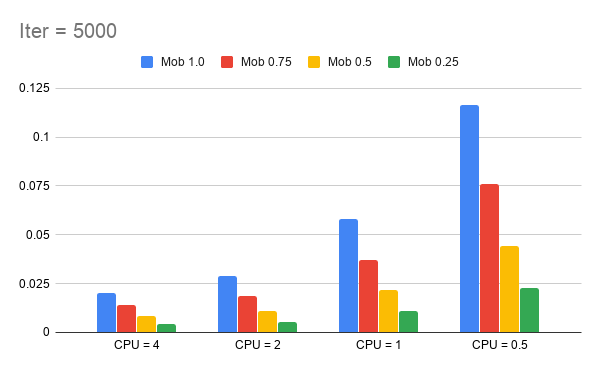

In [8]:
from IPython.display import Image
Image(filename='exp_img/5000_1.png') 

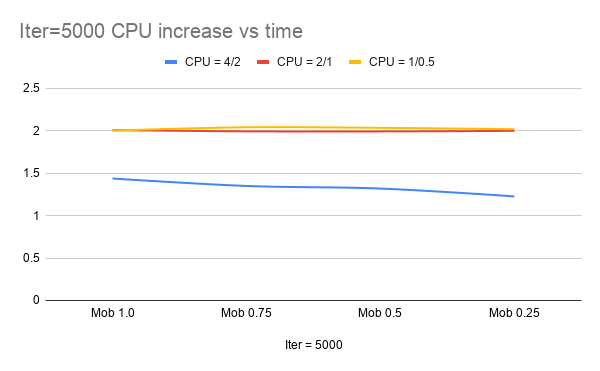

In [9]:
Image(filename='exp_img/5000_2.png') 

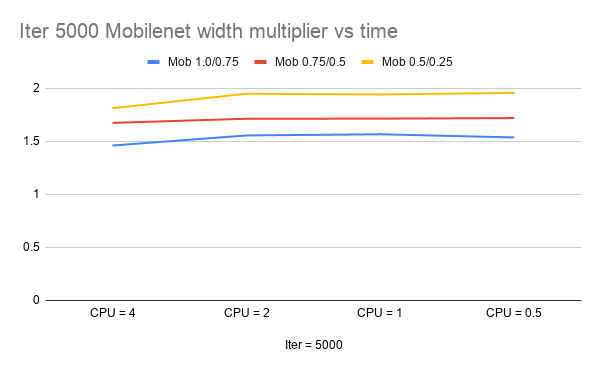

In [10]:
Image(filename='exp_img/5000_3.png') 

# Iter = 500

| Exp   |      Mob 1.0      |  Mob 0.75  |Mob 0.5   |Mob 0.25   |
|----------|:-------------:|:-------------:|:-------------:|:-------------:|
|  CPU = 4  |  0.02051069524 | 0.01426426142 | 0.008495391378 | 0.004515069188 |
| CPU = 2   | 0.02922545242 | 0.01855015136 | 0.01072093597 | 0.005292796298 |
| CPU = 1  |  0.05900840658 | 0.03781192797 | 0.02081295101 | 0.01101532969 |
| CPU = 0.5  |  0.1174173313 | 0.07161711947 | 0.04177759899 | 0.02059194843 |

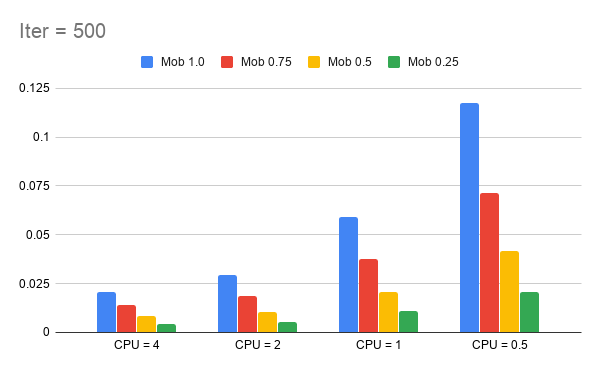

In [11]:
Image(filename='exp_img/500_1.png') 

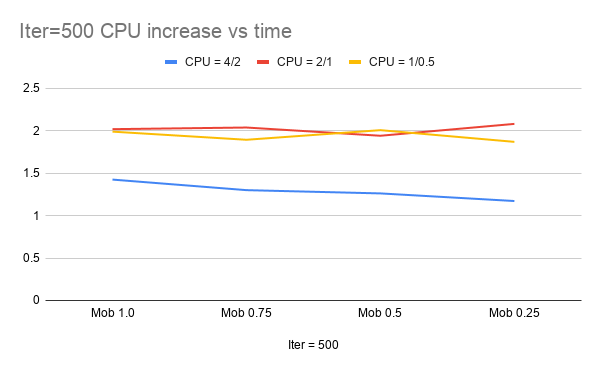

In [12]:
Image(filename='exp_img/500_2.png') 

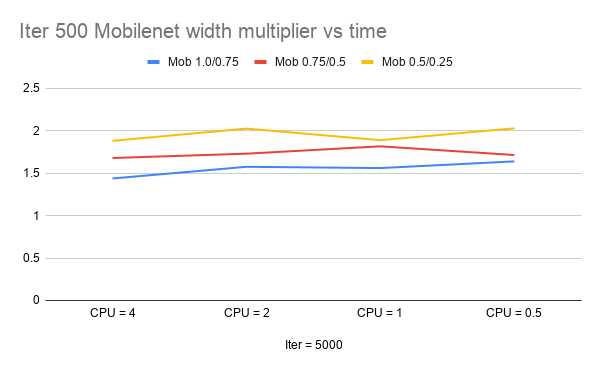

In [13]:
Image(filename='exp_img/500_3.png') 

# Caveat - 

An important factor to note about these results is that the code used reaches a threshold at CPU=4 where despite availablability of further resources, The average CPU utilization is throttled at (270% , 300%) range. Hence the code cannot scale beyond more computation resources. This is reflected in the results as well, where CPU = 4 becomes an outlier/